# создание матриц и глубокие нейронные сети

In [1]:
import numpy as np

streetlights = np.array(
    [[1, 0, 1], [0, 1, 1], [0, 0, 1], [1, 1, 1], [0, 1, 1], [1, 0, 1]]
)

In [2]:
walk_vs_stop = np.array([[0], [1], [0], [1], [1], [0]])


Error: [0.04], Prediction: -0.19999999999999996
Error: [0.0256], Prediction: -0.15999999999999992
Error: [0.016384], Prediction: -0.1279999999999999
Error: [0.01048576], Prediction: -0.10239999999999982
Error: [0.00671089], Prediction: -0.08191999999999977
Error: [0.00429497], Prediction: -0.06553599999999982
Error: [0.00274878], Prediction: -0.05242879999999994
Error: [0.00175922], Prediction: -0.04194304000000004
Error: [0.0011259], Prediction: -0.03355443200000008
Error: [0.00072058], Prediction: -0.02684354560000002
Error: [0.00046117], Prediction: -0.021474836479999926
Error: [0.00029515], Prediction: -0.01717986918399994
Error: [0.00018889], Prediction: -0.013743895347199997
Error: [0.00012089], Prediction: -0.010995116277759953
Error: [7.73712525e-05], Prediction: -0.008796093022207963
Error: [4.95176016e-05], Prediction: -0.007036874417766459
Error: [3.1691265e-05], Prediction: -0.0056294995342132115
Error: [2.02824096e-05], Prediction: -0.004503599627370569
Error: [1.29807421e

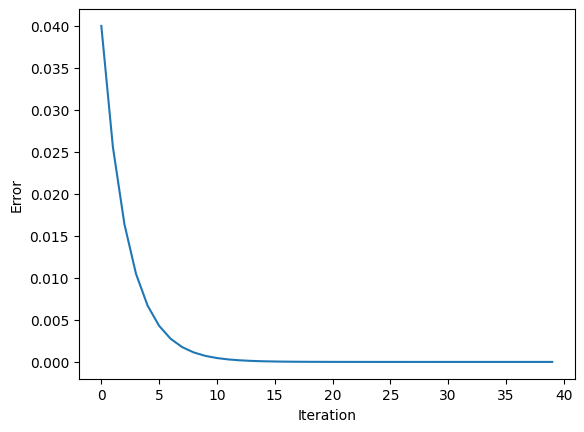

In [3]:
weights = np.array([0.5, 0.48, -0.7])
alpha = 0.1

input = streetlights[0]
goal_prediction = walk_vs_stop[0]
error_list = []
for iteration in range(40):
    prediction = input.dot(weights)
    error = (goal_prediction - prediction) ** 2
    delta = prediction - goal_prediction
    weights = weights - (alpha * (input * delta))
    error_list.append(error)

    print(f"Error: {error}, Prediction: {prediction}")

# draw the graph
import matplotlib.pyplot as plt

plt.plot(range(40), error_list)
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.show()

обучение на полном наборе данных.


In [4]:
import numpy as np

weights = np.array([0.5, 0.48, -0.7])
alpha = 0.1

streetlights = np.array([[1, 0, 1], [0, 1, 1], [0, 0, 1], [1, 1, 1], [0, 1, 1], [1, 0, 1]])
walk_vs_stop = np.array([[0], [1], [0], [1], [1], [0]])

input = streetlights[0]
goal_prediction = walk_vs_stop[0]

for iteration in range(40):
    error_for_all_lights = 0
    for row_index in range(len(walk_vs_stop)):
        input = streetlights[row_index]
        goal_prediction = walk_vs_stop[row_index]

        prediction = input.dot(weights)
        error = (goal_prediction - prediction) ** 2
        error_for_all_lights += error
        delta = prediction - goal_prediction
        weights = weights - (alpha * (input * delta))
        print(f"Prediction: {prediction}")

    print(f"Error: {error_for_all_lights}\n")

Prediction: -0.19999999999999996
Prediction: -0.19999999999999996
Prediction: -0.5599999999999999
Prediction: 0.6160000000000001
Prediction: 0.17279999999999995
Prediction: 0.17552
Error: [2.65612311]

Prediction: 0.14041599999999999
Prediction: 0.3066464
Prediction: -0.34513824
Prediction: 1.006637344
Prediction: 0.4785034751999999
Prediction: 0.26700416768
Error: [0.96287018]

Prediction: 0.213603334144
Prediction: 0.5347420299776
Prediction: -0.26067345110016
Prediction: 1.1319428845096962
Prediction: 0.6274723921901568
Prediction: 0.25433999330650114
Error: [0.55091659]

Prediction: 0.20347199464520088
Prediction: 0.6561967149569552
Prediction: -0.221948503950995
Prediction: 1.166258650532124
Prediction: 0.7139004922542389
Prediction: 0.21471099528371604
Error: [0.36445837]

Prediction: 0.17176879622697283
Prediction: 0.7324724146523222
Prediction: -0.19966478845083285
Prediction: 1.1697769945341199
Prediction: 0.7719890116601171
Prediction: 0.17297997428859369
Error: [0.25167687]


In [5]:
weights

array([ 0.01389228,  1.0138147 , -0.01599277])

1. стохастический градиентный спуск
2. градиентный спуск по всем данным
3. mini-batch градиентный спуск

__regularization__

нужная чтобы оказывать давление на веса, которые мало влияют на результат и имеют то положительное то отрицательное давление на себя.

__больше слоев__

позволяет модели учиться более сложным функциям, но также увеличивает время обучения.
на промежуточных слоях - данные которые лучше коррелируют с результатами

а как распространять ошибку - ошибка на выходе, умножаем на веса и передаем в предыдущий слой (более низкий) - это backpropagation

__нелинейность__

без нелинейности - нейронная сеть - это просто линейная регрессия, можно свести любую нейронную сеть к линейной регрессии (или до 2 слоев - входной и выходной) - добавление слоев без нелинейности бесполезно.

ReLU - аналог логики "если узел становится отрицательным, то отключается" - ускоряет обучение и улучшает результаты. Позволяет выучивать нелинейные функции.


## deep NN

In [6]:
import numpy as np

np.random.seed(1)

def relu(x):
    return (x > 0) * x

alpha = 0.2
hidden_size = 4

streetlights = np.array([[1, 0, 1],
                         [0, 1, 1],
                         [0, 0, 1],
                         [1, 1, 1],
                            [0, 1, 1],
                            [1, 0, 1]
                         ])

walk_vs_stop = np.array([[0, 1, 0, 1, 1, 0]]).T

weights_0_1 = 2 * np.random.random((3, hidden_size)) - 1
weights_1_2 = 2 * np.random.random((hidden_size, 1)) - 1

layer_0 = streetlights[0]
layer_1 = relu(np.dot(layer_0, weights_0_1))
layer_2 = np.dot(layer_1, weights_1_2)

print(f'layer_0: {layer_0}')
print(f'layer_1: {layer_1}')
print(f'layer_2: {layer_2}')

layer_0: [1 0 1]
layer_1: [-0.          0.51828245 -0.         -0.        ]
layer_2: [0.39194327]


In [7]:
def relu2deriv(output):
    return output > 0

for iteration in range(60):
    layer_2_error = 0
    for i in range(len(streetlights)):
        layer_0 = streetlights[i:i+1]
        layer_1 = relu(np.dot(layer_0, weights_0_1))
        layer_2 = np.dot(layer_1, weights_1_2)

        layer_2_error += np.sum((layer_2 - walk_vs_stop[i:i+1]) ** 2)
        layer_2_delta = layer_2 - walk_vs_stop[i:i+1]
        layer_1_delta = layer_2_delta.dot(weights_1_2.T) * relu2deriv(layer_1)

        weights_1_2 -= alpha * layer_1.T.dot(layer_2_delta)
        weights_0_1 -= alpha * layer_0.T.dot(layer_1_delta)

    if iteration % 10 == 9:
        print(f'Error: {layer_2_error}')

Error: 0.31298811341557736
Error: 0.043272385299784624
Error: 0.0034372657015086937
Error: 0.00019649599346773566
Error: 1.015593230102771e-05
Error: 5.122102420300414e-07


In [8]:
print(f'weights 12: {weights_1_2}')
print(f'weights 01: {weights_0_1}')


weights 12: [[-0.5910955 ]
 [ 0.65496806]
 [-0.94522481]
 [ 0.89087375]]
weights 01: [[-1.65955991e-01  1.93337742e-01 -9.99771250e-01 -4.28171342e-04]
 [-7.06488218e-01 -8.15322810e-01 -6.27479577e-01  1.12213677e+00]
 [-2.06465052e-01 -1.93644695e-01 -1.61610971e-01  4.65920967e-04]]


In [9]:
for i in range(len(streetlights)):
        layer_0 = streetlights[i:i+1]
        layer_1 = relu(np.dot(layer_0, weights_0_1))
        layer_2 = np.dot(layer_1, weights_1_2)
        print(f'Prediction: {layer_2}')

Prediction: [[3.36301502e-05]]
Prediction: [[1.00009726]]
Prediction: [[0.00041508]]
Prediction: [[0.99971582]]
Prediction: [[1.00009726]]
Prediction: [[3.36301502e-05]]


In [10]:
# all together

import numpy as np

np.random.seed(1)

def relu(x):
    """
    Applies the Rectified Linear Unit (ReLU) activation function to the input.

    Parameters:
    x (float): The input value.

    Returns:
    float: The output value after applying the ReLU activation function.
    """
    return (x > 0) * x

def relu2deriv(output):
    """
    Derivative of the ReLU activation function.

    Parameters:
    output (float): The output value of the ReLU function.

    Returns:
    float: The derivative of the ReLU function.
    """
    return output > 0

streetlights = np.array([[1, 0, 1],
                            [0, 1, 1],
                            [0, 0, 1],
                            [1, 1, 1]
                            ])

walk_vs_stop = np.array([[1, 1, 0, 0]]).T
alpha = 0.2
hidden_size = 4

weights_0_1 = 2 * np.random.random((3, hidden_size)) - 1
weights_1_2 = 2 * np.random.random((hidden_size, 1)) - 1

error_list = []
for iteration in range(60):
    layer_2_error = 0
    for i in range(len(streetlights)):
        layer_0 = streetlights[i:i+1]
        layer_1 = relu(np.dot(layer_0, weights_0_1))
        layer_2 = np.dot(layer_1, weights_1_2)

        layer_2_error += np.sum((layer_2 - walk_vs_stop[i:i+1]) ** 2)
        layer_2_delta = layer_2 - walk_vs_stop[i:i+1]
        layer_1_delta = layer_2_delta.dot(weights_1_2.T) * relu2deriv(layer_1)

        weights_1_2 -= alpha * layer_1.T.dot(layer_2_delta)
        weights_0_1 -= alpha * layer_0.T.dot(layer_1_delta)
    error_list.append(layer_2_error)
    if iteration % 10 == 9:
        print(f'Error: {layer_2_error}')

# add plotly plot for error_list
import plotly.graph_objects as go

fig = go.Figure(data=go.Scatter(x=list(range(60)), y=error_list))
fig.update_layout(title='Error over time', xaxis_title='Iteration', yaxis_title='Error')
fig.show()



Error: 0.6342311598444467
Error: 0.35838407676317513
Error: 0.0830183113303298
Error: 0.006467054957103705
Error: 0.0003292669000750734
Error: 1.5055622665134859e-05
